# Coronary heart didease (CHD) prediction using logistic regression model

## The dataset is from an ongoing cardiovascular study on residents of the town of Framingham, Massachusetts. The dataset provides the patients’ information. Data was precleaned and premodified with Google Spreadsheets.

# Exploring data

### Import of needed libraries

In [678]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm

### Reading data and assigning to variable df

In [681]:
df = pd.read_csv('data1.csv')

### The number of rows and columns in the dataset

In [684]:
df.shape

(4238, 16)

### The number of columns' Non-Null values and data type

In [687]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age_log          4238 non-null   float64
 2   education        4238 non-null   int64  
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay_log   4238 non-null   float64
 5   BPMeds           4238 non-null   int64  
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol_log      4238 non-null   float64
 10  sysBP_log        4238 non-null   float64
 11  diaBP_log        4238 non-null   float64
 12  BMI_log          4238 non-null   float64
 13  heartRate_log    4238 non-null   float64
 14  glucose_log      4238 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(8), int64(8)
memory usage: 529.9 KB


### The number of duplicates

In [690]:
df.duplicated().sum()

0

# EDA

### Correlation matrix serves as a valuable tool for understanding the relationships between variables and informing the selection and interpretation of predictors in a linear regression model.

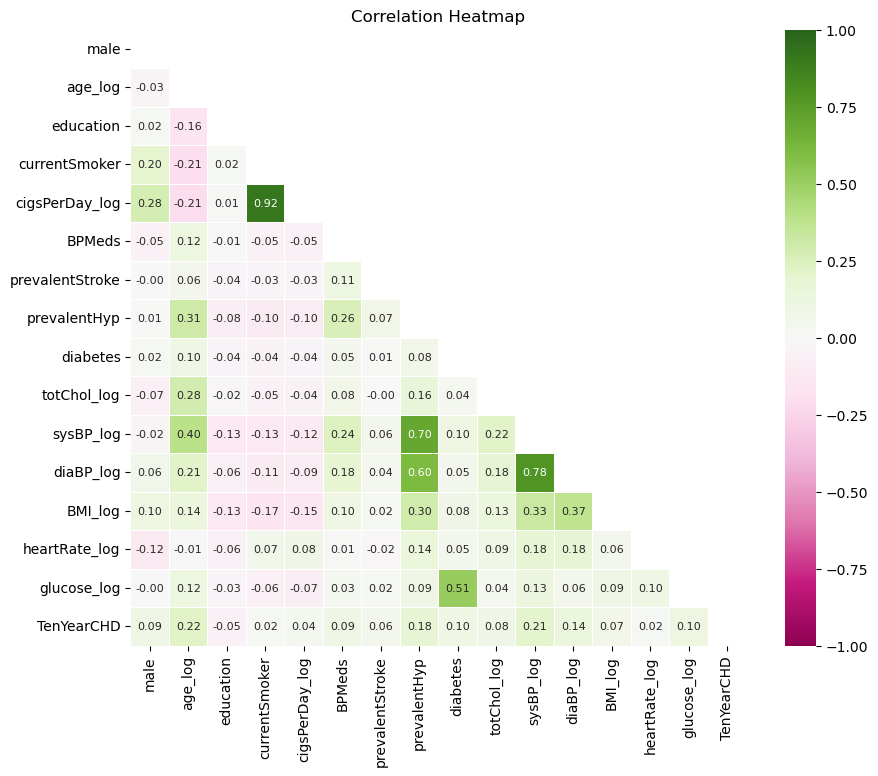

In [694]:
corr = df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(corr,
            annot=True,
            linewidths=.5,
            square=True,
            vmin=-1,
            vmax=1,
            fmt='.2f',
            mask=mask,
            annot_kws={'fontsize':8},
            cmap='PiYG'
           )
plt.title('Correlation Heatmap')
plt.show()

In [695]:
corr_values = df.corr()['TenYearCHD'].drop('TenYearCHD')

sorted_corr = corr_values.sort_values(ascending=False)
sorted_corr

age_log            0.223323
sysBP_log          0.210430
prevalentHyp       0.177603
diaBP_log          0.136486
glucose_log        0.101967
diabetes           0.097317
male               0.088428
BPMeds             0.086417
totChol_log        0.078979
BMI_log            0.071606
prevalentStroke    0.061810
cigsPerDay_log     0.042593
heartRate_log      0.022962
currentSmoker      0.019456
education         -0.053383
Name: TenYearCHD, dtype: float64

## Correlations observations
### - current_smoke and cigs_per_day have a positive correlation
### - prevalent_hyp has a correlation with sys_bp, dla_dp
### - ten_year_chd (target) has no significant correlation, it means that in case of a good performing model - it will not be due to specific predictor

### Using boxplot to distinguish outliers

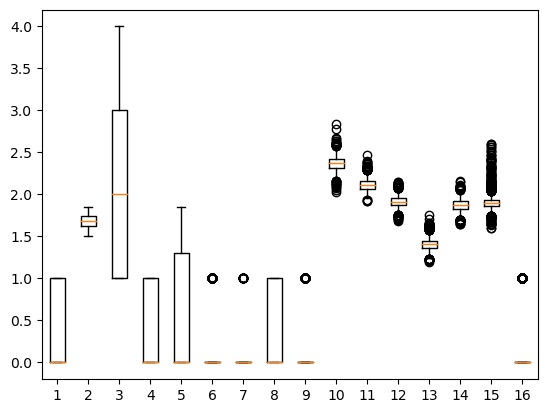

In [700]:
plt.boxplot(df)
plt.show()

### Target class distribution

In [703]:
df['TenYearCHD'].value_counts()

TenYearCHD
0    3594
1     644
Name: count, dtype: int64

### - 0,1792 ratio of those with and without CHD
### - Negative 85%
### - Positive 15%

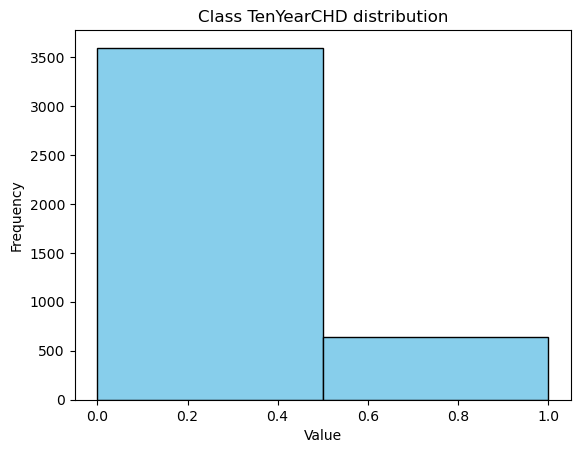

In [706]:
plt.hist(df['TenYearCHD'], bins=2, color='skyblue', edgecolor='black')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Class TenYearCHD distribution')
plt.show()

### There is a class imbalance issue since there are 644 positive cases (individuals with CHD) and 3594 negative cases (individuals without CHD).

## Creating model to get variables p-values

In [710]:
predictors = ['male', 'age_log', 'education', 'currentSmoker',
              'cigsPerDay_log', 'BPMeds', 'prevalentStroke',
              'prevalentHyp', 'diabetes', 'totChol_log', 'sysBP_log',
              'diaBP_log', 'BMI_log', 'heartRate_log', 'glucose_log']
TenYearCHD = 'TenYearCHD'
X = pd.get_dummies(df[predictors], prefix='', prefix_sep='',
                   drop_first=True)
y = df[TenYearCHD]

In [712]:
model = sm.Logit(y, X)

In [714]:
result = model.fit(method='newton')

Optimization terminated successfully.
         Current function value: 0.389883
         Iterations 7


In [716]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             TenYearCHD   No. Observations:                 4238
Model:                          Logit   Df Residuals:                     4223
Method:                           MLE   Df Model:                           14
Date:                Wed, 01 May 2024   Pseudo R-squ.:                 0.08498
Time:                        11:33:52   Log-Likelihood:                -1652.3
converged:                       True   LL-Null:                       -1805.8
Covariance Type:            nonrobust   LLR p-value:                 4.298e-57
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
male                0.4100      0.098      4.189      0.000       0.218       0.602
age_log             5.2963      0.686      7.716      0.000       3.951       6.642
education          -0.0710      0.046     -1.558      0.119      -0.160       0.018
currentSmoker      -0.5914      0.253     -2.336      0.020      -1.088      -0.095
cigsPerDay_log      0.7619      0.201      3.798      0.000       0.369       1.155
BPMeds              0.4038      0.214      1.885      0.059      -0.016       0.824
prevalentStroke     0.8549      0.437      1.958      0.050      -0.001       1.711
prevalentHyp        0.8819      0.112      7.908      0.000       0.663       1.101
diabetes            0.9824      0.254      3.871      0.000       0.485       1.480
totChol_log        -1.0863      0.557     -1.951      0.051      -2.178       0.005
sysBP_log           2.5486      1.152      2.212      0.027       0.290       4.807
diaBP_log          -3.8941      1.126     -3.459      0.001      -6.100      -1.688
BMI_log            -1.2843      0.726     -1.770      0.077      -2.707       0.138
heartRate_log      -2.4088      0.651     -3.700      0.000      -3.685      -1.133
glucose_log        -0.2057      0.539     -0.382      0.703      -1.262       0.850
===================================================================================
"""

### Variable 'education' has higher p-value and relatively weak correlation with the target variable. This variable will not be included into the model.

## Model training

In [720]:
predictors = ['male', 'age_log', 'currentSmoker',
              'cigsPerDay_log', 'BPMeds', 'prevalentStroke',
              'prevalentHyp', 'diabetes', 'totChol_log', 'sysBP_log',
              'diaBP_log', 'BMI_log', 'heartRate_log', 'glucose_log']
TenYearCHD = 'TenYearCHD'
X = pd.get_dummies(df[predictors], prefix='', prefix_sep='',
                   drop_first=True)
y = df[TenYearCHD]

### Splitting data into train/test groups and creating the model

In [723]:
x_train, x_test, y_train, y_test =\
    train_test_split(X, y, test_size=0.2, random_state=0)
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)

model = LogisticRegression(solver='liblinear', C=1,
                           random_state=0)
model.fit(x_train, y_train)

LogisticRegression(C=1, random_state=0, solver='liblinear')

In [725]:
x_test = scaler.transform(x_test)

In [727]:
y_pred = model.predict(x_test)

### Baseline reference point for the model's predictions

In [730]:
model.intercept_

array([-1.95559084])

### Coefficients associated with each predictor variable

In [733]:
model.coef_

array([[ 0.25194703,  0.54246979, -0.23116067,  0.43390165,  0.04425479,
         0.06707679,  0.17243031,  0.05016454,  0.09764923,  0.30638162,
        -0.09988636,  0.05148022, -0.03148961,  0.13240908]])

### Coefficients quantify the direct impact of predictor variables on the log odds of the event
### - Positive Coefficients: A positive coefficient indicates that as the predictor variable increases, the log odds of CHD occurrence also increase.
### - Negative Coefficients: A negative coefficient indicates that as the predictor variable increases, the log odds of CHD occurrence decrease.
### - Variables having the most significant impact on predicting CHD risk: age, cigsPerDay, sysBP.

### Odds ratios associated with each predictor variable

In [737]:
odds_ratios = np.exp(model.coef_)
odds_ratios

array([[1.28652789, 1.72025028, 0.79361195, 1.54326709, 1.04524864,
        1.0693776 , 1.18818901, 1.05144409, 1.10257596, 1.35850064,
        0.90494025, 1.05282836, 0.96900102, 1.14157522]])

### Odds ratios provide a relative measure of the change in odds associated with predictor variables.
### - An odds ratio greater than 1 suggests that an increase in the predictor variable is associated with higher odds of CHD occurrence.
### - An odds ratio less than 1 suggests that an increase in the predictor variable is associated with lower odds of CHD occurrence.
### - An odds ratio equal to 1 suggests no change in the odds of CHD occurrence for a one-unit increase in the predictor variable.
### - Top risk factors: age, cigsPerDay, prevalentHyp.

## Model evaluation

### Accuracy of the model
### .score() takes the input and output as arguments and returns the ratio of the number of correct predictions to the number of observations.

In [742]:
model.score(x_train, y_train)

0.852212389380531

In [744]:
model.score(x_test, y_test)

0.8726415094339622

### Situation where the training set accuracy is much higher might indicate overfitting. The test set accuracy is more relevant for evaluating the performance on unseen data since it’s not biased.
### According to the scores, logistic regression model performs reasonably well in terms of predicting the presence or absence of CHD.

## ROC curve, AUC

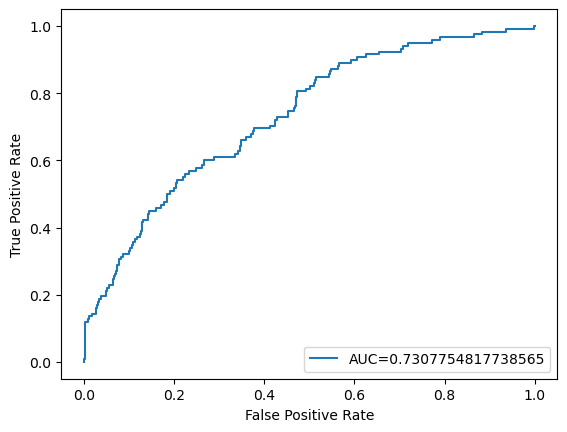

In [748]:
y_pred_proba = model.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

### AUC of 0.73 suggests that the logistic regression model has moderate discriminative power in predicting CHD occurrence, indicating that it performs better than random guessing, but there is still room for improvement in its predictive accuracy.

## Confusion matrix

In [752]:
confusion_matrix(y_test, y_pred)

array([[728,   2],
       [106,  12]])

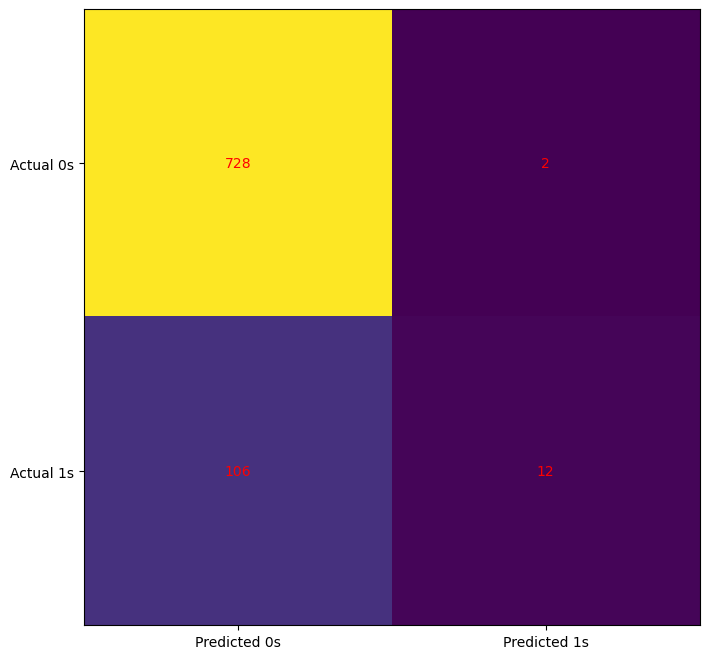

In [754]:
cm = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='r')
plt.show()

In [756]:
## True Negatives (TN): 728 instances were correctly classified as negative (no CHD).
## False Positives (FP): 2 instances were incorrectly classified as positive (CHD), while they were actually negative. ## False Negatives (FN): 106 instances were incorrectly classified as negative (no CHD), while they were actually positive.
## True Positives (TP): 12 instances were correctly classified as positive (CHD).

## Precision, Recall (sensitivity), F1-score

In [759]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      1.00      0.93       730
           1       0.86      0.10      0.18       118

    accuracy                           0.87       848
   macro avg       0.87      0.55      0.56       848
weighted avg       0.87      0.87      0.83       848



### - Precision: Precision measures the proportion of true positive predictions (correctly predicted instances of CHD) among all instances predicted as positive (predicted as having CHD).
### For class 0 (no CHD), precision is 0.87, indicating that 87% of instances predicted as not having CHD were correctly classified.
### For class 1 (CHD), precision is 0.86, indicating that 86% of instances predicted as having CHD were correctly classified.
### - Recall (Sensitivity): Recall measures the proportion of true positive predictions among all actual positive instances (instances with CHD).
### For class 0 (no CHD), recall is 1.00, indicating that 100% of actual instances of no CHD were correctly classified.
### For class 1 (CHD), recall is 0.10, indicating that only 10% of actual instances of CHD were correctly classified.
### -F1-score: The F1-score is the harmonic mean of precision and recall and provides a balance between the two metrics. F1 score can be interpreted as a measure of overall model performance from 0 to 1, where 1 is the best.
### For class 0 (no CHD), the F1-score is 0.93 (very good).
### For class 1 (CHD), the F1-score is 0.18 (not good).

## Conclusions

### Created logistic regression model has high accuracy of 0.87 and AUC of 0.73 indicating that it performs better than random guessing. 
### Nevertheless, there is a high class imbalance, in this case meaning that even a model, which predicts 0s each time will have an 85% accuracy.  
### A low recall of 0.1 (high false negative rate) and F1-score of 0.18 suggest that the model struggles to effectively identify individuals with CHD, potentially leading to missed diagnoses and inadequate risk assessment. 
### In the context of the problem, high recall is a must for a models good performance.